# Moving Average Process 

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../My-Code/')

import timetools as tt

%matplotlib inline

In [3]:
# plt.rcParams['figure.figsize'] = (10, 7.5)
plt.style.use('seaborn')

## Simulate MA(2) process 

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [4]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [5]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

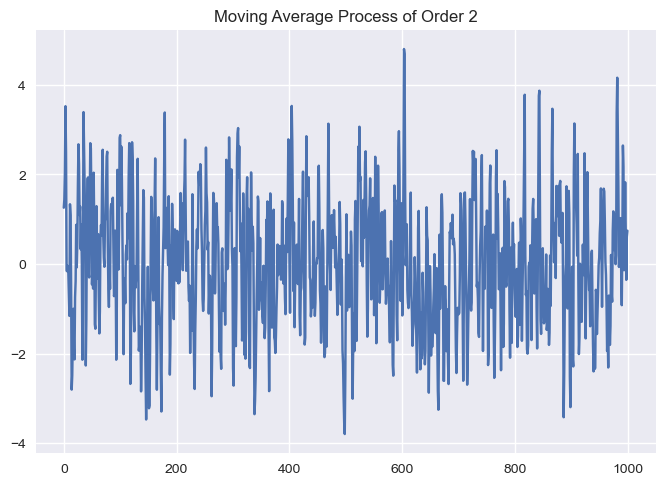

In [6]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

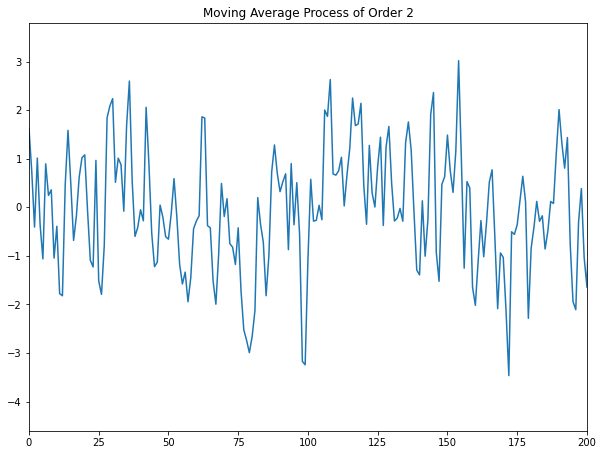

In [17]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

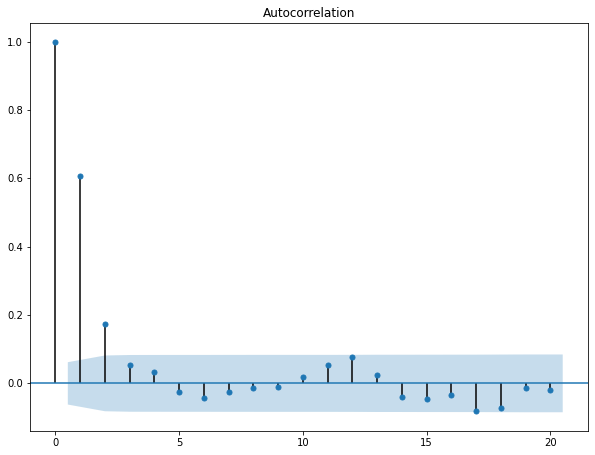

In [20]:
plot_acf(MA2_process, lags=20);

In [23]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1432.702
Date:                Mon, 28 Dec 2020   AIC                           2873.405
Time:                        11:39:06   BIC                           2893.024
Sample:                             0   HQIC                          2880.862
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.069      0.145      0.884      -0.125       0.145
ma.L1          0.8624      0.032     27.090      0.000       0.800       0.925
ma.L2          0.2708      0.032      8.484      0.0